# TP 3 : Classification non linéaire 
# Dani Halegua, Luca Champesting et Idyano Leroy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(1) : 

In [2]:
def y(x1, x2):
    if ( -1 <= x1 <= -0.5 or 0 <= x1 <= 0.5) and ( -1 <= x2 <= -0.5 or 0 <= x2 <= 0.5):
        return 1
    elif ( -0.5 <= x1 <= 0 or 0.5 <= x1 <= 1) and ( -0.5 <= x2 <= 0 or 0.5 <= x2 <= 1):
        return 1
    else :
        return -1

def ech_train_test(nbApp, nbTest):
    X_train = np.random.uniform(-1, 1, (nbApp, 2))
    y_train = np.zeros(nbApp)
    X_test = np.random.uniform(-1, 1, (nbTest, 2))
    y_test = np.zeros(nbTest)
    for i in range(nbApp):
        y_train[i] = y(X_train[:,0][i], X_train[:,1][i])
    for j in range(nbTest):
        y_test[j] = y(X_test[:,0][j], X_test[:,1][j])
    return X_train, y_train, X_test, y_test

nbApp = 300; nbTest = 1000
X_train, y_train, X_test, y_test = ech_train_test(nbApp, nbTest)

(2) :

In [3]:
def transform(x1,x2,dpoly):
    f = []
    for i in range (1,dpoly):
        for j in range(1,dpoly):
            if(i+j)<dpoly+1:
                f+=[(x1**(i+1))*(x2**(j+1))] #calcul de feature
    return np.array(f)

def create_data(X,dpoly): #effectue la transformation sur un echantillon
    n = X.shape[0]
    s=0
    for i in range(1,dpoly):
        s+=i
    df = np.zeros((n,s))
    
    for j in range(n):
        for i in range (s):
            df[j,i] = transform(X[j][0],X[j][1],dpoly)[i]
    return pd.DataFrame(df)

(3) :

In [4]:
dpoly = 5
X_train2 = create_data(X_train,dpoly)
X_test2 = create_data(X_test,dpoly)

In [5]:
X_train2

,0,1,2,3,4,5,6,7,8,9
0,6.154665e-01,5.343792e-01,4.639752e-01,4.028468e-01,-5.561109e-01,-4.828437e-01,-4.192294e-01,5.024796e-01,4.362783e-01,-4.540205e-01
1,4.293141e-07,3.803178e-08,3.369132e-09,2.984623e-10,-3.175347e-09,-2.812954e-10,-2.491920e-11,2.348591e-11,2.080553e-12,-1.737094e-13
2,5.788282e-05,-5.374440e-06,4.990188e-07,-4.633407e-08,4.742866e-06,-4.403768e-07,4.088915e-08,3.886262e-07,-3.608408e-08,3.184368e-08
3,3.810725e-01,3.682720e-01,3.559015e-01,3.439465e-01,2.434167e-01,2.352402e-01,2.273383e-01,1.554866e-01,1.502637e-01,9.931979e-02
4,1.619023e-01,-7.753537e-02,3.713186e-02,-1.778253e-02,1.360293e-01,-6.514476e-02,3.119797e-02,1.142910e-01,-5.473424e-02,9.602665e-02
...,...,...,...,...,...,...,...,...,...,...
295,6.104318e-04,2.188157e-05,7.843681e-07,2.811650e-08,-4.207405e-04,-1.508189e-05,-5.406262e-07,2.899956e-04,1.039520e-05,-1.998797e-04
296,3.997241e-02,-9.935579e-03,2.469597e-03,-6.138451e-04,-3.215198e-02,7.991726e-03,-1.986431e-03,2.586159e-02,-6.428179e-03,-2.080188e-02
297,4.671267e-02,-1.964817e-02,8.264368e-03,-3.476139e-03,-2.400294e-02,1.009606e-02,-4.246582e-03,1.233373e-02,-5.187784e-03,-6.337591e-03
298,1.179428e-02,-2.271361e-03,4.374222e-04,-8.423943e-05,6.651087e-03,-1.280877e-03,2.466732e-04,3.750712e-03,-7.223179e-04,2.115119e-03


In [6]:
from sklearn.svm import SVC

In [7]:
C = 1/10
clf = SVC(C=C, kernel='linear')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

(4) :

In [8]:
cpt=0
for i in range(len(y_test)):
    if (y_pred[i]!=y_test[i]):
        cpt+=1

print("Erreur = ", cpt/len(y_test))
clf.score(X_train2,y_train)

Erreur =  0.488


0.5133333333333333

In [9]:
def afficher(poly_gauss,X_train,y_train,X_test,y_test,dpoly,C,kernel):
    
    if poly_gauss == 1:                             #NOYAU POLY
        X_train2 = create_data(X_train,dpoly)
        X_test2 = create_data(X_test,dpoly)
        clf = SVC(C=C, kernel=kernel)
        clf.fit(X_train2,y_train)
        y_pred_train = clf.predict(X_train2)
        y_pred_test = clf.predict(X_test2)
    
    else:                                         #NOYAU GAUSSIEN
        clf = SVC(C=C, kernel=kernel)
        clf.fit(X_train,y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

    plt.figure(figsize=(12,12))
    for i in range(X_train.shape[0]):
        if (y_train[i]==-1) and (y_pred_train[i]==-1): #bien classee (rond rouge)
            plt.scatter(X_train[i][0],X_train[i][1],color ='red')
        elif (y_train[i]==-1) and (y_pred_train[i]==1): #mal classee (croix rouge)
            plt.scatter(X_train[i][0],X_train[i][1],color ='red',marker = 'x')
        elif(y_train[i]==1) and (y_pred_train[i]==1): #bien classee (rond noir)
            plt.scatter(X_train[i][0],X_train[i][1],color ='black')
        else: #mal classee (croix noire)
            plt.scatter(X_train[i][0],X_train[i][1],color ='black',marker = 'x')
    
    for i in range(X_test.shape[0]):
        if (y_test[i]==-1) and (y_pred_test[i]==-1): #bien classee (rond rouge)
            plt.scatter(X_test[i][0],X_test[i][1],color ='red')
        elif(y_test[i]==-1) and (y_pred_test[i]==1): #mal classee (croix rouge)
            plt.scatter(X_test[i][0],X_test[i][1],color ='red',marker ='x')
        elif(y_test[i]==1) and (y_pred_test[i]==1): #bien classee (rond noir)
            plt.scatter(X_test[i][0],X_test[i][1],color ='black')
        else: #mal classee (croix noire)
            plt.scatter(X_test[i][0],X_test[i][1],color ='black',marker='x')
    plt.show()

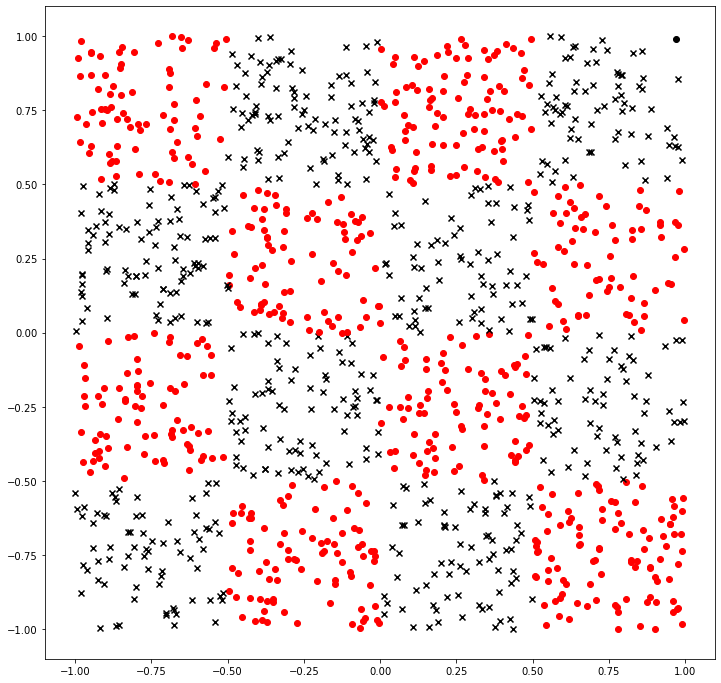

In [10]:
afficher(1,X_train,y_train,X_test,y_test, 5, 1/10,'linear')

(5) :

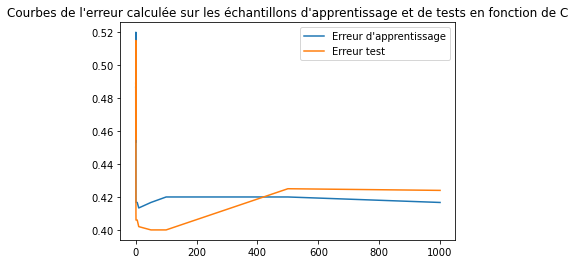

In [11]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.title("Courbes de l'erreur calculée sur les échantillons d'apprentissage et de tests en fonction de C")
plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [12]:
err_train

[0.4866666666666667,
 0.4866666666666667,
 0.45333333333333337,
 0.52,
 0.42000000000000004,
 0.41666666666666663,
 0.41666666666666663,
 0.41333333333333333,
 0.41666666666666663,
 0.42000000000000004,
 0.42000000000000004,
 0.41666666666666663]

In [13]:
err_test

[0.489,
 0.488,
 0.45499999999999996,
 0.515,
 0.41000000000000003,
 0.406,
 0.406,
 0.402,
 0.4,
 0.4,
 0.42500000000000004,
 0.42400000000000004]

Meilleur score pour $C=10$

(6) :

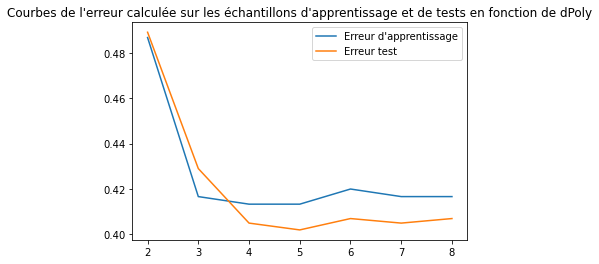

In [15]:
dpoly=[i for i in range(2,9)]
err_test=[]
err_train=[]
C=10
for d in dpoly:
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.title("Courbes de l'erreur calculée sur les échantillons d'apprentissage et de tests en fonction de dPoly")
plt.plot(dpoly,err_train,label="Erreur d'apprentissage")
plt.plot(dpoly,err_test,label="Erreur test")
plt.legend()
plt.show() 

Meilleur score pour dpoly = 4, pour C = 10

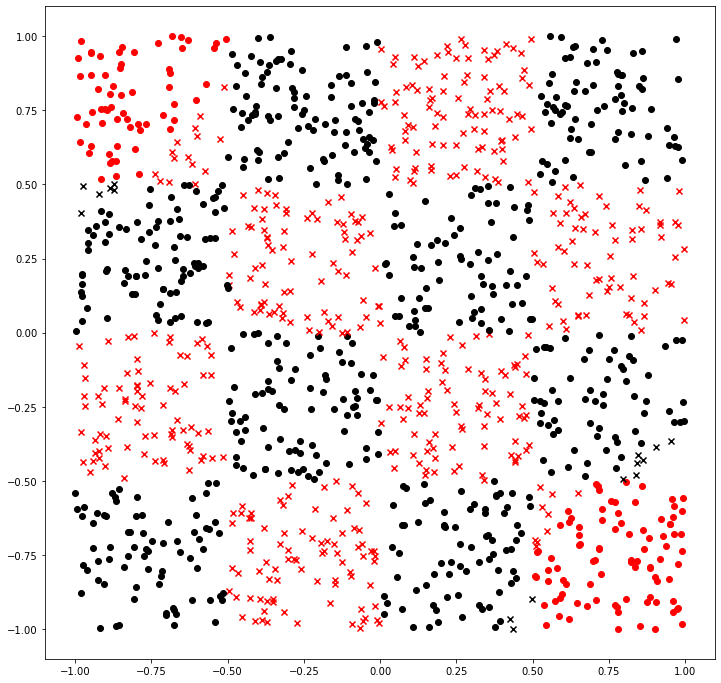

In [16]:
afficher(1,X_train,y_train,X_test,y_test, 4, 10,'linear')

(7)
## Noyau gaussien
Kernel par défaut dans scikit-learn

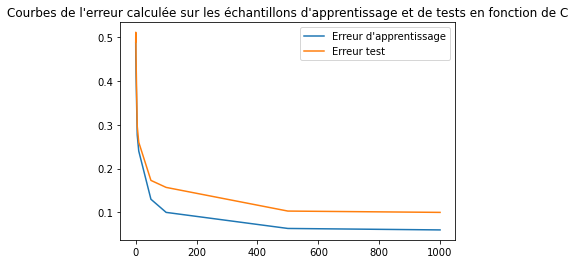

In [17]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c)
    clf.fit(X_train,y_train)
    err_train+=[1-clf.score(X_train,y_train)]
    err_test+=[1-clf.score(X_test,y_test)]

plt.title("Courbes de l'erreur calculée sur les échantillons d'apprentissage et de tests en fonction de C")
plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

Plus C est grand, meilleur est le score

In [18]:
C=1000
clf = SVC(C=C,gamma='auto')
clf.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'auto'",1-clf.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'auto'",1-clf.score(X_test,y_test))


clf2 = SVC(C=C,gamma='scale')
clf2.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'scale'",1-clf2.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'scale'",1-clf2.score(X_test,y_test))

Erreur sur le jeu d'entrainement avec gamma = 'auto' 0.26
Erreur sur le jeu test avec gamma = 'auto' 0.276
Erreur sur le jeu d'entrainement avec gamma = 'scale' 0.06000000000000005
Erreur sur le jeu test avec gamma = 'scale' 0.09999999999999998


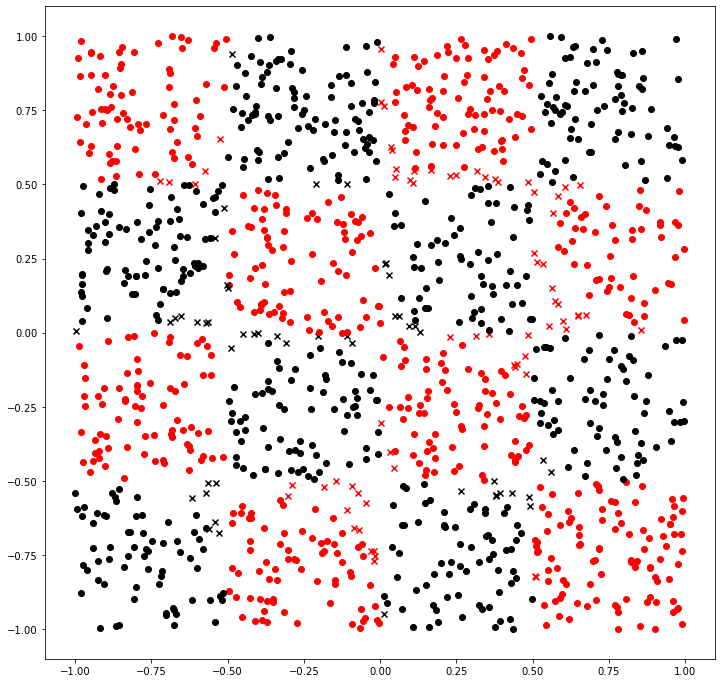

In [19]:
afficher(0,X_train,y_train,X_test,y_test, 0, 1000,'rbf')    #gamma is set at 'scale' by default

Le noyau gaussien couplé à un $\gamma =$ 'scale', ie = 1 / (n_features * var(X)) donne de bien meilleurs résultats que précedemment pour C = 1000!

# Exercice 2

(1) :

In [20]:
def y2(x1,x2):
    if (50*x1**2+0.5*x2**2-1)>0:
        return 1
    else:
        return -1

    
def ech_train_test2(nbApp, nbTest):
    X_train = np.random.uniform(-1, 1, (nbApp, 2))
    y_train = np.zeros(nbApp)
    X_test = np.random.uniform(-1, 1, (nbTest, 2))
    y_test = np.zeros(nbTest)
    for i in range(nbApp):
        y_train[i] = y2(X_train[:,0][i], X_train[:,1][i])
    for j in range(nbTest):
        y_test[j] = y2(X_test[:,0][j], X_test[:,1][j])
    return X_train, y_train, X_test, y_test

nbApp = 150; nbTest = 500
X_train, y_train, X_test, y_test = ech_train_test2(nbApp, nbTest)

In [21]:
dpoly = 5
X_train2 = create_data(X_train,dpoly)
X_test2 = create_data(X_test,dpoly)

In [22]:
C = 1/10
clf = SVC(C=C, kernel='linear')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

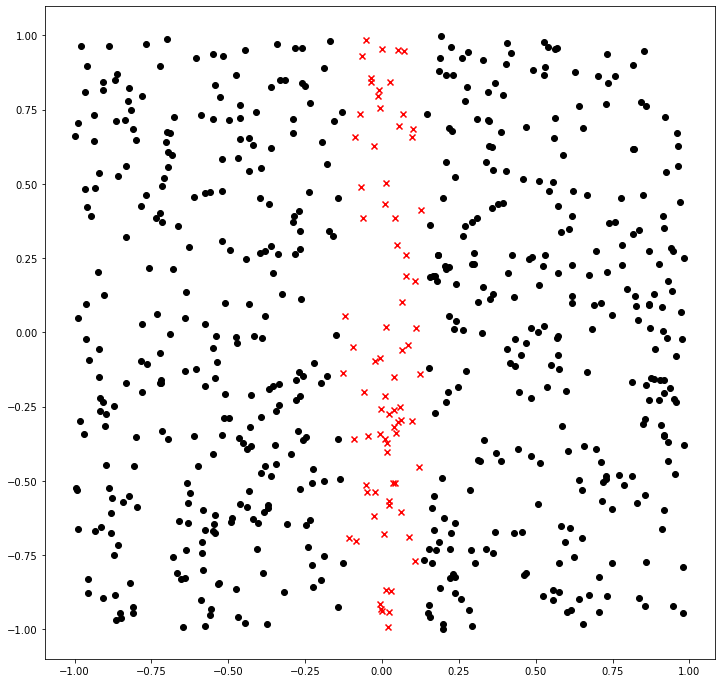

In [23]:
afficher(1,X_train,y_train,X_test,y_test, 5, 1/10,'linear')

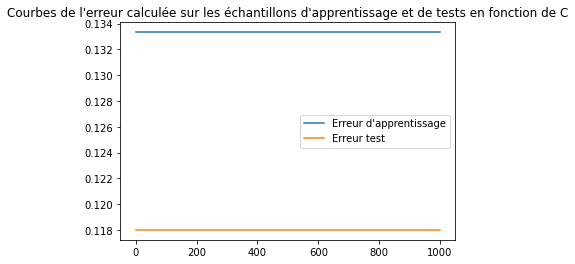

In [24]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.title("Courbes de l'erreur calculée sur les échantillons d'apprentissage et de tests en fonction de C")
plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [25]:
err_test

[0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118]

In [26]:
err_train

[0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333]

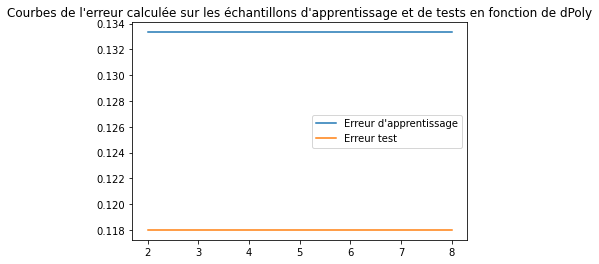

In [27]:
dpoly=[i for i in range(2,9)]
err_test=[]
err_train=[]
C=5
for d in dpoly:
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train2,y_train)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-clf.score(X_test2,y_test)]

plt.title("Courbes de l'erreur calculée sur les échantillons d'apprentissage et de tests en fonction de dPoly")
plt.plot(dpoly,err_train,label="Erreur d'apprentissage")
plt.plot(dpoly,err_test,label="Erreur test")
plt.legend()
plt.show() 

In [28]:
err_test

[0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118]

In [29]:
err_train

[0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333]

Il semblerait que quelque soit les valeurs de dPoly et C les erreurs ne semblent pas changer

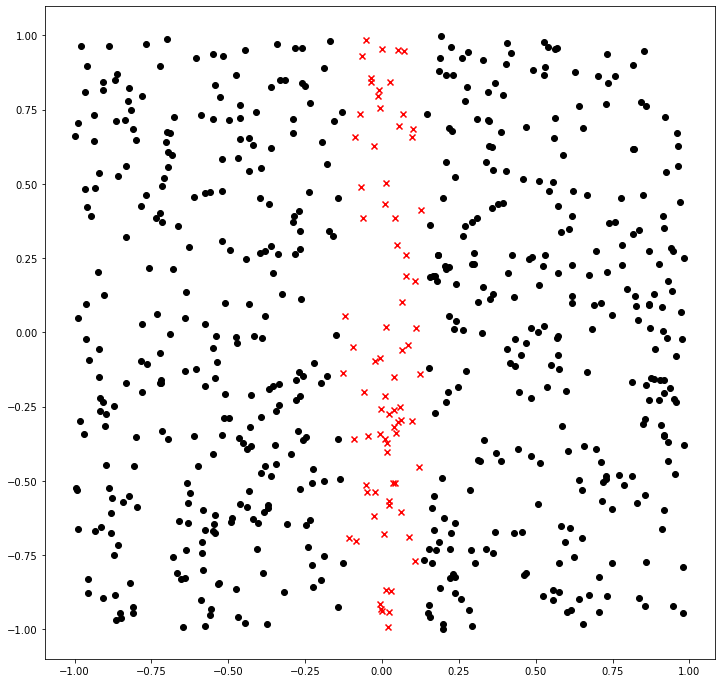

In [30]:
afficher(1,X_train,y_train,X_test,y_test, 7, 1,'linear')

## Noyau gaussien

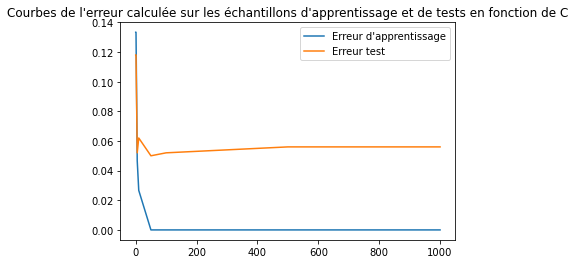

In [31]:
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in C:
    clf = SVC(C=c)
    clf.fit(X_train,y_train)
    err_train+=[1-clf.score(X_train,y_train)]
    err_test+=[1-clf.score(X_test,y_test)]

plt.title("Courbes de l'erreur calculée sur les échantillons d'apprentissage et de tests en fonction de C")
plt.plot(C,err_train,label="Erreur d'apprentissage")
plt.plot(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [32]:
err_test    #best result pour C = 500

[0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.118,
 0.052000000000000046,
 0.062000000000000055,
 0.050000000000000044,
 0.052000000000000046,
 0.05600000000000005,
 0.05600000000000005]

In [33]:
err_train

[0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.046666666666666634,
 0.026666666666666616,
 0.0,
 0.0,
 0.0,
 0.0]

In [34]:
C=500
clf = SVC(C=C,gamma='auto')
clf.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'auto'",1-clf.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'auto'",1-clf.score(X_test,y_test))


clf2 = SVC(C=C,gamma='scale')
clf2.fit(X_train,y_train)
print("Erreur sur le jeu d'entrainement avec gamma = 'scale'",1-clf2.score(X_train,y_train))
print("Erreur sur le jeu test avec gamma = 'scale'",1-clf2.score(X_test,y_test))


Erreur sur le jeu d'entrainement avec gamma = 'auto' 0.0
Erreur sur le jeu test avec gamma = 'auto' 0.05600000000000005
Erreur sur le jeu d'entrainement avec gamma = 'scale' 0.0
Erreur sur le jeu test avec gamma = 'scale' 0.05600000000000005


Le noyau gaussien couplé à un $\gamma =$ 'scale', ie = 1 / (n_features * var(X)) donne de bien meilleurs résultats que précedemment pour C = 500!

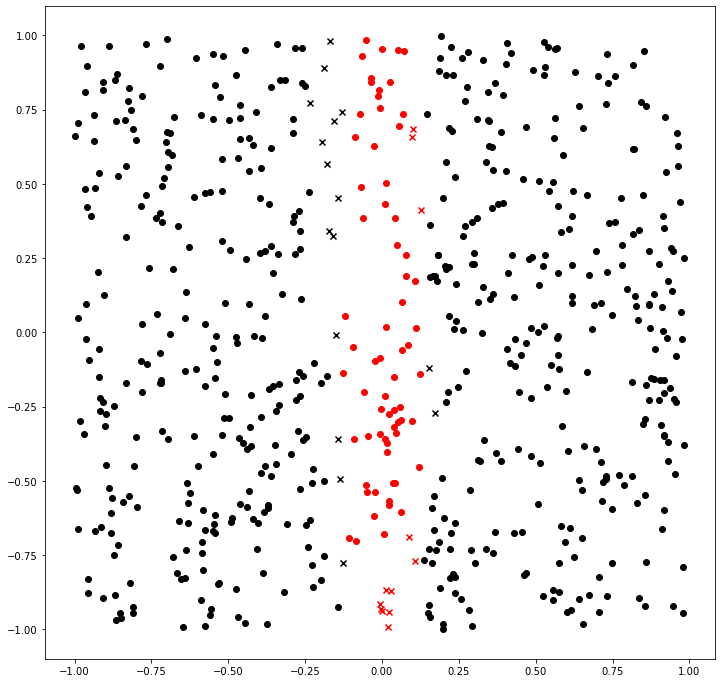

In [35]:
afficher(0,X_train,y_train,X_test,y_test, 0, 500,'rbf') 